In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import seaborn as sns

### Visualisation:

In [ ]:
series =pd.read_csv('Airlines+Data.csv', header=0, index_col=0,parse_dates=True)

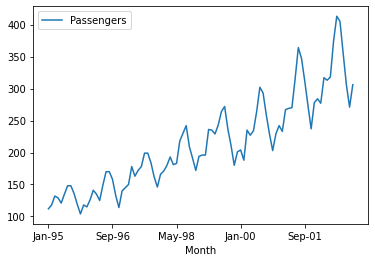

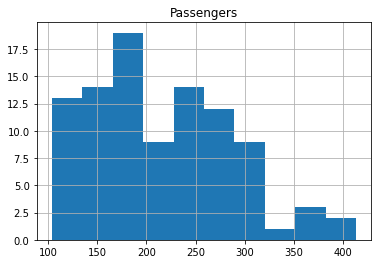

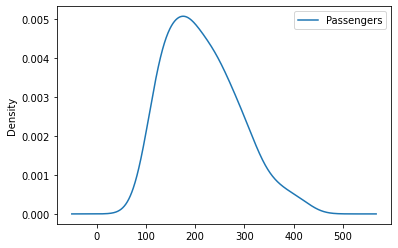

In [ ]:
# create a line plot
series.plot()
pyplot.show()

# create a histogram plot
series.hist()
pyplot.show()

# create a density plot
series.plot(kind='kde')
pyplot.show()

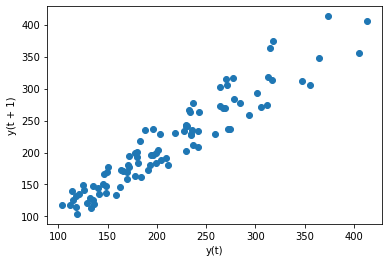

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


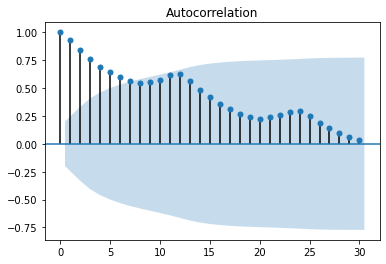

In [ ]:
# create a scatter plot
from pandas.plotting import lag_plot
lag_plot(series)
pyplot.show()

# create an autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series,lags=30)
pyplot.show()

### Resampling and Interpolation:

In [ ]:
series = pd.read_csv('Airlines+Data.csv')
series

,Month,Passengers
0,Jan-95,112
1,Feb-95,118
2,Mar-95,132
3,Apr-95,129
4,May-95,121
...,...,...
91,Aug-02,405
92,Sep-02,355
93,Oct-02,306
94,Nov-02,271


In [ ]:
series["Date"] = pd.to_datetime(series.Month,format="%b-%y")
series["month"] = series.Date.dt.strftime("%b") # month extraction
series["year"] = series.Date.dt.strftime("%Y") # year extraction
series["Day"] = series.Date.dt.strftime("%d")

In [ ]:
series=series.drop(['Month'],axis=1)
series=pd.DataFrame(series)
series=series.drop(['year','month'],axis=1)
series

,Passengers,Date,Day
0,112,1995-01-01,01
1,118,1995-02-01,01
2,132,1995-03-01,01
3,129,1995-04-01,01
4,121,1995-05-01,01
...,...,...,...
91,405,2002-08-01,01
92,355,2002-09-01,01
93,306,2002-10-01,01
94,271,2002-11-01,01


In [ ]:
#Upsampling Data
series['date'] = pd.to_datetime(series['Date'])
series = series.set_index('date') 
upsampled= series.resample('D').sum()
upsampled.head(32)

,Passengers
date,
1995-01-01,112
1995-01-02,0
1995-01-03,0
1995-01-04,0
1995-01-05,0
1995-01-06,0
1995-01-07,0
1995-01-08,0
1995-01-09,0


            Passengers
date                  
1995-01-01         112
1995-01-02           0
1995-01-03           0
1995-01-04           0
1995-01-05           0
1995-01-06           0
1995-01-07           0
1995-01-08           0
1995-01-09           0
1995-01-10           0
1995-01-11           0
1995-01-12           0
1995-01-13           0
1995-01-14           0
1995-01-15           0
1995-01-16           0
1995-01-17           0
1995-01-18           0
1995-01-19           0
1995-01-20           0
1995-01-21           0
1995-01-22           0
1995-01-23           0
1995-01-24           0
1995-01-25           0
1995-01-26           0
1995-01-27           0
1995-01-28           0
1995-01-29           0
1995-01-30           0
1995-01-31           0
1995-02-01         118


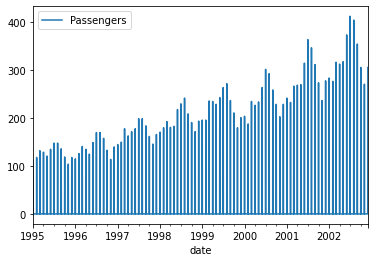

In [ ]:
#interpolate the missing value
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(32))
interpolated.plot()
pyplot.show()

            Passengers
date                  
1995-03-31         362
1995-06-30         385
1995-09-30         432
1995-12-31         341
1996-03-31         382


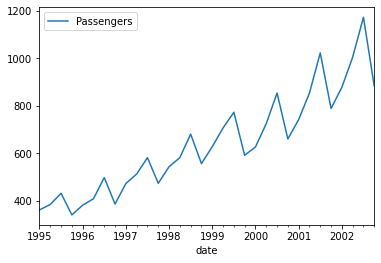

In [ ]:
#Downsampling Data
series['date'] = pd.to_datetime(series['Date'])
series = series.set_index('date') 
quarterly_mean = series.resample('Q').sum()
print(quarterly_mean.head())
quarterly_mean.plot()
pyplot.show()

### Tranformations

In [ ]:
import pandas as pd
series = pd.read_csv('Airlines+Data.csv', header=0, index_col=0, parse_dates=True)
series

,Passengers
Month,
Jan-95,112
Feb-95,118
Mar-95,132
Apr-95,129
May-95,121
...,...
Aug-02,405
Sep-02,355
Oct-02,306


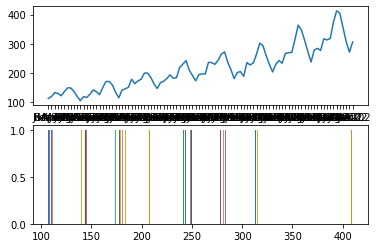

In [ ]:
from matplotlib import pyplot
# line plot
pyplot.subplot(211)
pyplot.plot(series)
# histogram
pyplot.subplot(212)
pyplot.hist(series)
pyplot.show()

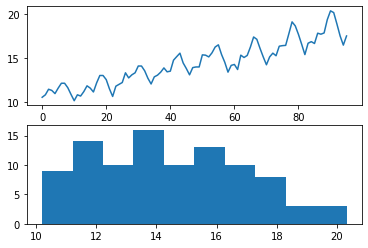

In [ ]:
#Square Root Transform
from pandas import DataFrame
from numpy import sqrt
dataframe = DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = sqrt(dataframe['passengers'])

# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()

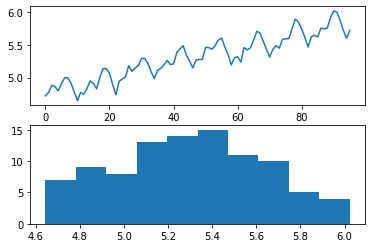

In [ ]:
#Log Transform
from numpy import log
dataframe = DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = log(dataframe['passengers'])

# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()

### Data Driven Models :

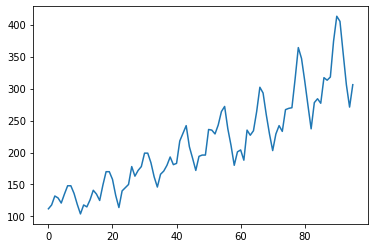

In [1]:
import pandas as pd
import numpy as np
series = pd.read_csv('Airlines+Data.csv')
series.Passengers.plot()

In [2]:
series["Date"] = pd.to_datetime(series.Month,format="%b-%y")
series["month"] = series.Date.dt.strftime("%b") # month extraction
series["year"] = series.Date.dt.strftime("%Y") # year extraction
series

,Month,Passengers,Date,month,year
0,Jan-95,112,1995-01-01,Jan,1995
1,Feb-95,118,1995-02-01,Feb,1995
2,Mar-95,132,1995-03-01,Mar,1995
3,Apr-95,129,1995-04-01,Apr,1995
4,May-95,121,1995-05-01,May,1995
...,...,...,...,...,...
91,Aug-02,405,2002-08-01,Aug,2002
92,Sep-02,355,2002-09-01,Sep,2002
93,Oct-02,306,2002-10-01,Oct,2002
94,Nov-02,271,2002-11-01,Nov,2002


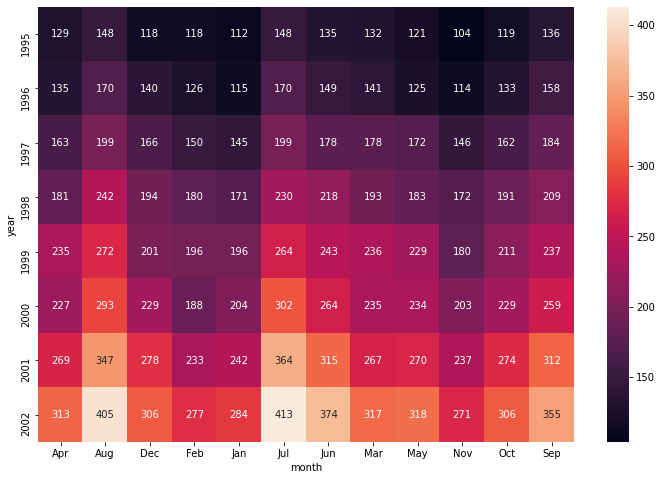

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=series,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

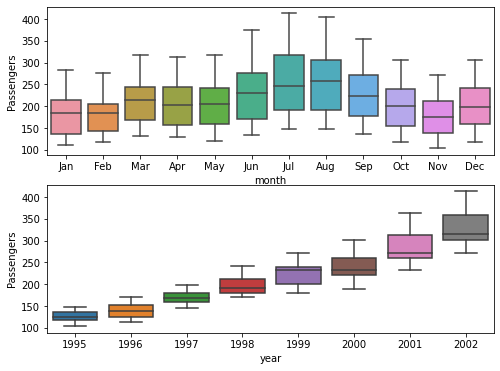

In [5]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=series)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=series)


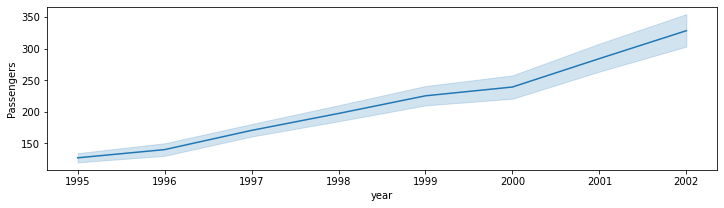

In [6]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=series)

In [9]:
from numpy import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
#Splitting data
Train = series.head(84)
Test = series.tail(12)

In [17]:
#Simple Exponential Method
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
RMSE=sqrt(mean_squared_error(pred_ses,Test.Passengers))
RMSE

64.84476396990432

In [20]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
RMSE= sqrt(mean_squared_error(pred_hw,Test.Passengers))
RMSE

95.7667445267506

In [23]:
#Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
RMSE=sqrt(mean_squared_error(pred_hwe_add_add,Test.Passengers)) 
RMSE

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


7.972746249264969

In [21]:
#Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
RMSE=sqrt(mean_squared_error(pred_hwe_mul_add,Test.Passengers))
RMSE

12.918734197606145

### Final Model by combining train and test

In [26]:
hwe_model_add_add = ExponentialSmoothing(series["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit()
hwe_model_add_add

In [25]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

96     312.897034
97     308.167827
98     355.528080
99     345.763587
100    345.688515
101    392.461275
102    436.489817
103    429.847617
104    380.161381
105    332.306168
dtype: float64

### Alternative Method:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Airlines+Data.csv')
df.head()
df.columns
df1 = df.reset_index()['Passengers']
df1.shape
plt.plot(df1)


In [ ]:
#Normalisation
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

In [ ]:
#train test split for time series data in ordered manner
train_size = int(len(df1)*0.65) #output should be integer value not float
test_size = len(df1)-train_size
train_data, test_data = df1[0:train_size,:], df1[0:test_size,:]

In [ ]:
#convert an array of values into dataset matrix
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]  ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [ ]:
#converting data into dependent and independant using timesteps
time_step = 10
x_train,y_train = create_dataset(train_data,time_step)
x_test, y_test  = create_dataset(test_data,time_step)
print(x_train.shape)
print(y_train.shape)

In [ ]:
#for LSTM model, x data needs to be in 3 dimensions[samples, timestep, festures]
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1], 1)

In [ ]:
#importing tf libarries for stacked LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

#create an stacked LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape = (100,1))) #(timestep, feature)
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

model.summary()

model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 200, batch_size=64, verbose = 1)

In [ ]:
#predicting the results
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

#rescaling the data to original form to get the desired results
train_predict = scaler.inverse_transform(train_predict)
test_predict  = scaler.inverse_transform((test_predict))

In [ ]:
import math
from sklearn.metrics import mean_squared_error, accuracy_score
math.sqrt(mean_squared_error(y_train, train_predict))
math.sqrt(mean_squared_error(y_test, test_predict))


In [ ]:
### Plotting 
# shift train predictions for plotting
import numpy
look_back=10
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:

#since, time_step =100, to predict the prices for next 30 days, we have to take values from last 100 days
x_input=test_data[86:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)